<a href="https://colab.research.google.com/github/wallajg/Machine-Learning/blob/master/just_messing_around.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just messing around
2.1.0

List all of the files in the default directory
sample_data

Listing all files in the bin directory
bash	       journalctl     sync
bunzip2        kill	      systemctl
bzcat	       kmod	      systemd
bzcmp	       less	      systemd-ask-password
bzdiff	       lessecho       systemd-escape
bzegrep        lessfile       systemd-hwdb
bzexe	       lesskey	      systemd-inhibit
bzfgrep        lesspipe       systemd-machine-id-setup
bzgrep	       ln	      systemd-notify
bzip2	       login	      systemd-sysusers
bzip2recover   loginctl       systemd-tmpfiles
bzless	       ls	      systemd-tty-ask-password-agent
bzmore	       lsblk	      tar
cat	       lsmod	      tempfile
chgrp	       mkdir	      touch
chmod	       mknod	      true
chown	       mktemp	      udevadm
cp	       more	      ulockmgr_server
dash	       mount	      umount
date	       mountpoint     uname
dd	       mv	      uncompress
df	       networkctl     vdir
dir	       nisdomainname  wdctl
dmesg	       

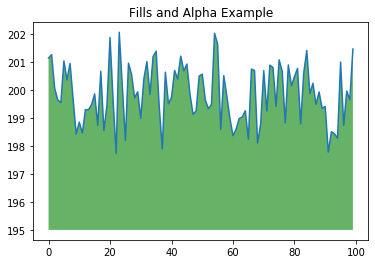

In [20]:
print ('Just messing around')

%tensorflow_version 2.x

import tensorflow
print (tensorflow.__version__)
print('')

# List all of the files in the default directory
print('List all of the files in the default directory')
!ls
print ('')

# list all of the files in the bin directory
print ('Listing all files in the bin directory')
!ls /bin
print ('')

# Mess around with np and matplotlib
import numpy as np
from matplotlib import pyplot as plt

# create an arrary of random values plus 200 that is one row with 100 columns
ys = 200 + np.random.randn(100)
print ('ys = ', ys)
print ('len(ys) = ',len(ys))
print ('type(ys) = ',type(ys))
print ('')

# Create an array of all ones with two rows and 50 columns
ts = np.ones((2,50))
print ('ts = ', ts)
print ('')

x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()


